In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
# from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.basis import Basis
from basis.fourier import FourierBasis

### Settings

In [3]:
N = 6 # runs
epochs = 1_000
refinement_epochs = 100
x_base_1 = BSplineBasis(degree=3, num_basis_functions=10)
b_base_1 = PolynomialBasis(degree=2)
x_base_2 = BSplineBasis(degree=1, num_basis_functions=10)
b_base_2 = PolynomialBasis(degree=2)
bases_pairs = [(x_base_1, b_base_1)]
x_bases = [x_base_1]

s_on_f_model = ScalarOnFunctionModel(bases_pairs=bases_pairs)

### Continuous

In [4]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs, refinement_epochs=refinement_epochs)

100%|██████████| 100/100 [00:05<00:00, 18.49it/s]


In [5]:
def split_array_by_columns(arr, col_splits):
    arrays = []
    start_col = 0
    for num_cols in col_splits:
        end_col = start_col + num_cols
        sub_array = arr[:, start_col:end_col]
        arrays.append(sub_array)
        start_col = end_col
    return arrays

In [6]:
split_coeffs = split_array_by_columns(best_design_s_on_f, [10])
t_values = np.linspace(0,1,100)
y_values = [x_bases[j].evaluate_combination(split_coeffs[j][i], t_values)
            for i in range(N)
            for j in range(len(split_coeffs))]
y_values = np.array(y_values).reshape(N,len(x_bases),100)

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8')

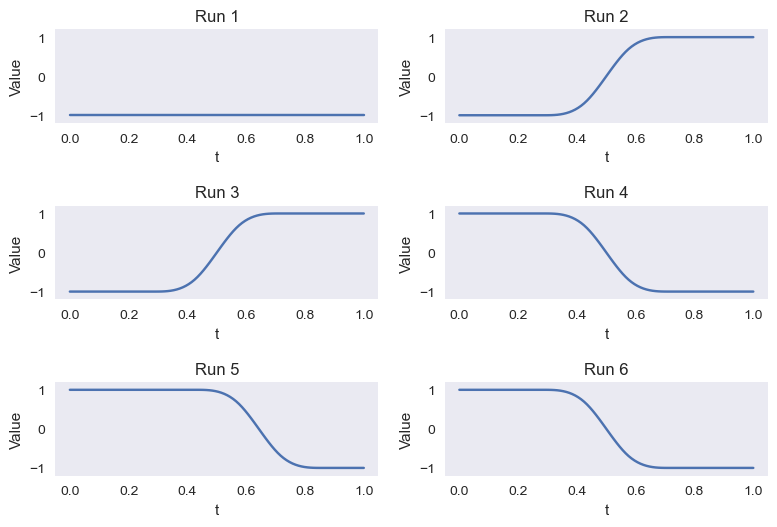

In [8]:
for i in range(y_values.shape[1]): # i bases
    fig, axes = plt.subplots(3, 2)
    axes = axes.flatten()
    for j in range(y_values.shape[0]): # j runs
        axes[j].plot(t_values, y_values[j][i])
        axes[j].set_title(f'Run {j+1}')
        axes[j].set_xlabel('t')
        axes[j].set_ylabel('Value')
        axes[j].grid(False)
        axes[j].set_ylim(-1.2, 1.2)
    plt.tight_layout()
    plt.show()

In [17]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

NameError: name 'subplot_results' is not defined

### Discrete

In [ ]:
optimizer_s_on_f = CordexDiscrete(model=s_on_f_model, runs=N, levels=lvls)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

In [ ]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### NBDO

### Test Js

In [ ]:
# Step - Poly
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family)
s_on_f_model.get_Jcb()

In [ ]:
# B-spline - Poly
k_degree = 3
Kx_family = 'b-spline'
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, k_degree=k_degree)
s_on_f_model.get_Jcb()

### Test plotting b-spline basis

In [ ]:
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, k_degree=k_degree)
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)

In [ ]:
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.fit(epochs=epochs)

In [ ]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_s_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')